In [1]:
from keras import layers, models
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and prepare the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

num_classes = 10
y_train, y_test = np.eye(num_classes)[y_train], np.eye(num_classes)[y_test]

In [3]:
# Create a convolutional neural network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4876 - accuracy: 0.8227 - val_loss: 0.3474 - val_accuracy: 0.8766
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3174 - accuracy: 0.8840 - val_loss: 0.3089 - val_accuracy: 0.8875
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2728 - accuracy: 0.8989 - val_loss: 0.2938 - val_accuracy: 0.8921
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2429 - accuracy: 0.9107 - val_loss: 0.2633 - val_accuracy: 0.9046
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2173 - accuracy: 0.9196 - val_loss: 0.2709 - val_accuracy: 0.9028
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1982 - accuracy: 0.9269 - val_loss: 0.2531 - val_accuracy: 0.9089
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1804 - accuracy: 0.9326 - val_loss: 0.2672 - val_ac

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9144
Test loss: 0.2666911780834198
Test accuracy: 0.9143999814987183


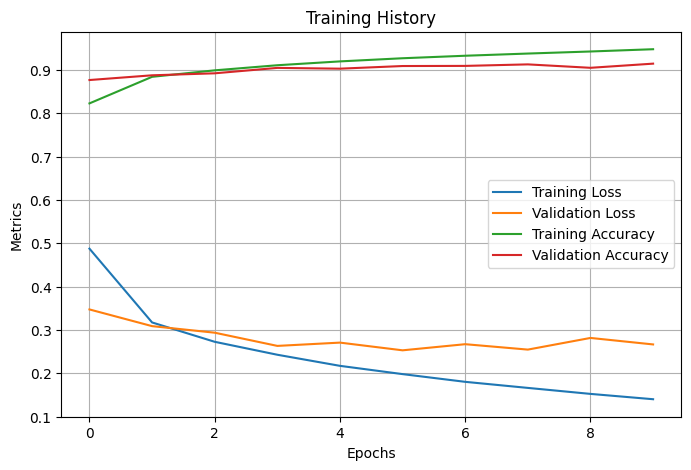

In [7]:
# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.title("Training History")
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


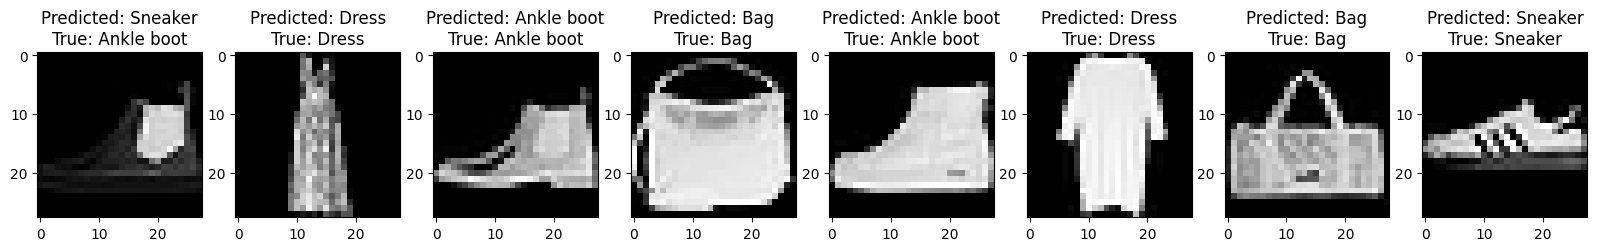

In [8]:
# Define class labels for Fashion MNIST
fashion_mnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Reshape X_test to match the expected input shape
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

predictions = model.predict(X_test)
# Make predictions and visualize random predictions
num_samples = 8
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Display images and predictions
plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = fashion_mnist_labels[np.argmax(predictions[idx])]
    true_label = fashion_mnist_labels[np.argmax(y_test[idx])]
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')

plt.show()

З вищенаведеними даними ми можемо зробити наступні висновки:

1. Навчання мережі проводилося протягом 10 епох, і на заключній епохі досягнута точність на тренувальному наборі становила приблизно 94,77%, а на валідаційному - близько 91,44%. 

2. У порівнянні з результатами попереднього завдання, де використовувалася багатошарова нейромережа, згорткова мережа показала значно кращі результати. Зокрема, точність класифікації на валідаційному наборі виросла з 90,76% до 91,44%.

3. На тестовому наборі даних згорткова нейромережа показала точність класифікації на рівні близько 91,44%, що також є досить високим показником. В той час як точність багатошарової нейромережі становила близько 86,6%.

4. Важливим аспектом цього завдання було підбор параметрів мережі, що сприяв покращенню результатів. Також слід відзначити, що згорткові мережі природньо підходять для обробки зображень завдяки їхнім здатностям до розпізнавання ознак на зображеннях. 

Отже, можна висновувати, що використання згорткової нейромережі для класифікації зображень Fashion MNIST є вдалим підходом, який дозволяє отримати високу точність класифікації.